import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [4]:
df1 = pd.read_csv('C:/Users/rajab/KaggleX_Bipoc/data/raw/cpu4.csv')
df1 = df1.sort_values(by='timestamp', ascending=True)
df1 = df1.replace({'label': {0.0: False, 1.0: True}})

In [22]:
df1.shape

(17568, 3)

How many anomalies do we have in the dataset?

In [33]:
print(df1.label.value_counts(), "\n","--------------------------")
print("in percentage", "\n", "--------------------------")
print(df1.label.value_counts(normalize=True))

False    17359
True       209
Name: label, dtype: int64 
 --------------------------
in percentage 
 --------------------------
False    0.988103
True     0.011897
Name: label, dtype: float64


In [12]:
df1.head()

,timestamp,value,label
0,1469376000,0.847300,False
1,1469376300,-0.036137,False
2,1469376600,0.074292,False
3,1469376900,0.074292,False
4,1469377200,-0.036137,False


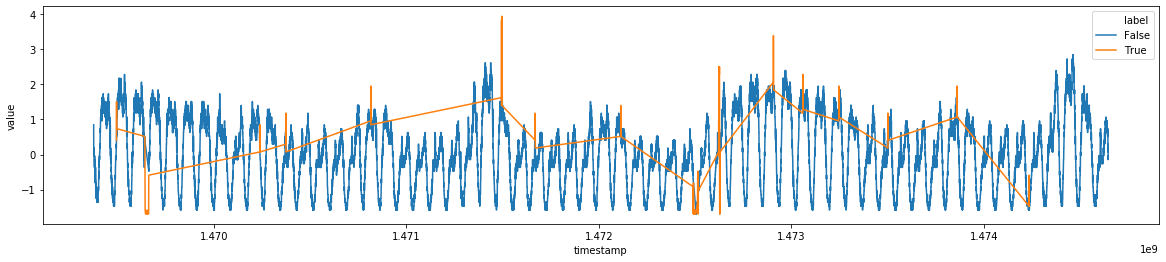

In [10]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df1, x="timestamp", y="value", hue="label")
plt.show()

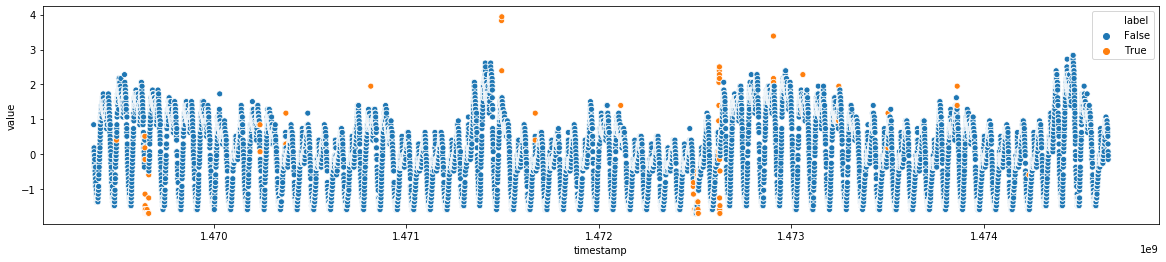

In [11]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df1, x="timestamp", y="value", hue="label")
plt.show()

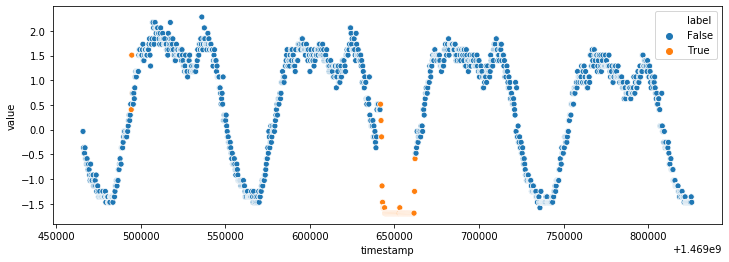

In [24]:
df1_zoom = df1[300:1500]
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="timestamp", y="value", hue="label")
plt.show()

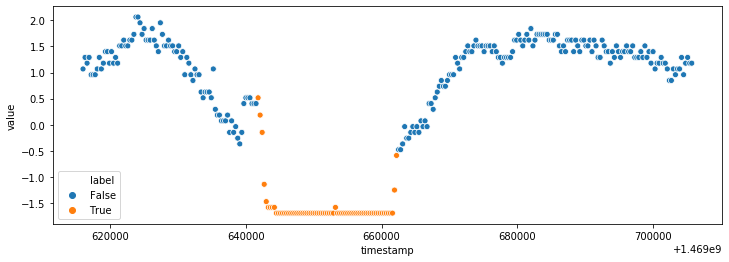

In [28]:
df1_zoom = df1[800:1100]
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="timestamp", y="value", hue="label")
plt.show()